In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
def plotStaircase_LR(filepath, blocks_to_plot, nStaircase, subj, eccentricity = 8, 
                     printTrialsSentToQuest = False, 
                     warnBouma = False, dispTypicalCrowdingThresholds = False, printBouma = False):
    '''
    Inputs:
    - filename: string containing the path of the file, including the name of the file
    - blocks_to_plot: array of blocks to plot
    - nStaircase: number of staircases in a block
    - subj: subject number
    - printTrialsSentToQuest: prints the number of trials sent to Quest in a block
    - printBouma: for crowding, print Bouma factor (threshold/eccentricity)
    - eccentricity: eccentricity of target (for calculating Bouma factor for crowding)
    '''
    
    # Read the CSV file
    ee_file = pd.read_csv(filepath)
    
    
    # Colormap and line styles
    cmap = cm.jet(np.linspace(0, 1, 6))
    linestyle = ['-.', '-'] 
    block_ct = -1
    
    plt.figure(figsize=(6, 6)) 
    
    # add patch for typical crowding thresholds (data from Kurzawski, Burchell, 2023)
    if dispTypicalCrowdingThresholds:
        ymin = 0.18 * eccentricity
        ymax = 0.41 * eccentricity
        plt.axhspan(ymin, ymax, color='lightgray', alpha=0.5)


    
    for b in blocks_to_plot:  # exclude first block (practice)
        block_ct += 1

        for s in range(1, nStaircase + 1): 
            block_of_interest = b
            staircase = s
            staircase_name = f'{block_of_interest}_{staircase}'
            
            # Filter data for specific block and staircase
            ee_file_block_cond = ee_file[ee_file['staircaseName'] == staircase_name]

            staircase_label = f'Repeat {block_ct + 1} (Block {b}), Staircase {s}'
            

            plt.plot( 
                range(len(ee_file_block_cond['questMeanBeforeThisTrialResponse'])),
                10 ** ee_file_block_cond['questMeanBeforeThisTrialResponse'],
                color=cmap[block_ct],
                linewidth=1,
                linestyle=linestyle[s - 2],
                label=staircase_label
            )

            # Print a warning if not enough trials are sent to quest
            trial_sent = ee_file_block_cond['trialGivenToQuest']
            num_sent = sum(trial_sent.dropna())
            if num_sent < 35:
                print(f'Warning: not enough trials are sent to Quest \n Staircase: {staircase_name} \n Number of trials sent: {num_sent} \n')
            # print number of trials sent to quest
            if printTrialsSentToQuest:
                print(f'{staircase_label} - Trials sent to quest: {num_sent}')
                
            # print Warning if Bouma is too small
            threshold_deg = 10 ** ee_file_block_cond['questMeanAtEndOfTrialsLoop'].dropna().iloc[0]
            bouma = np.around(threshold_deg/eccentricity, 3)
            if warnBouma:
                if bouma < 0.09:
                    print('Warning: Bouma too small!')
            # print Bouma factor
            if printBouma:
                print(f'{staircase_label} - Bouma: {bouma}')
        
   

    plt.ylim([0.005, 100])
    plt.title(f'Subject {subj}', fontsize=16)
    plt.xlabel('Trials', fontsize=14)
    plt.ylabel('Threshold (deg)', fontsize=14)
    plt.gca().set_yscale('log')
    plt.gca().tick_params(labelsize=14)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    plt.show()

  

In [4]:
# Colormap and line styles
cmap = cm.jet(np.linspace(0, 1, 6))
linestyle = ['-.', '-']

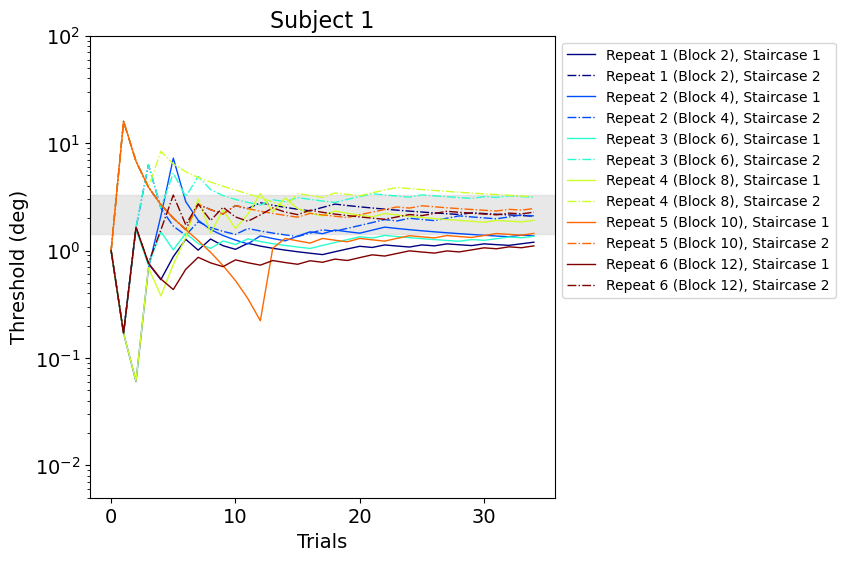

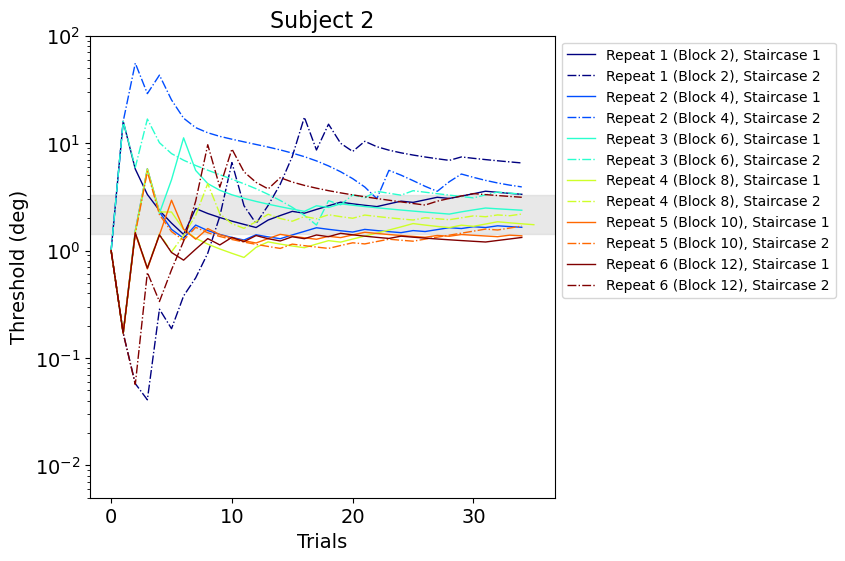

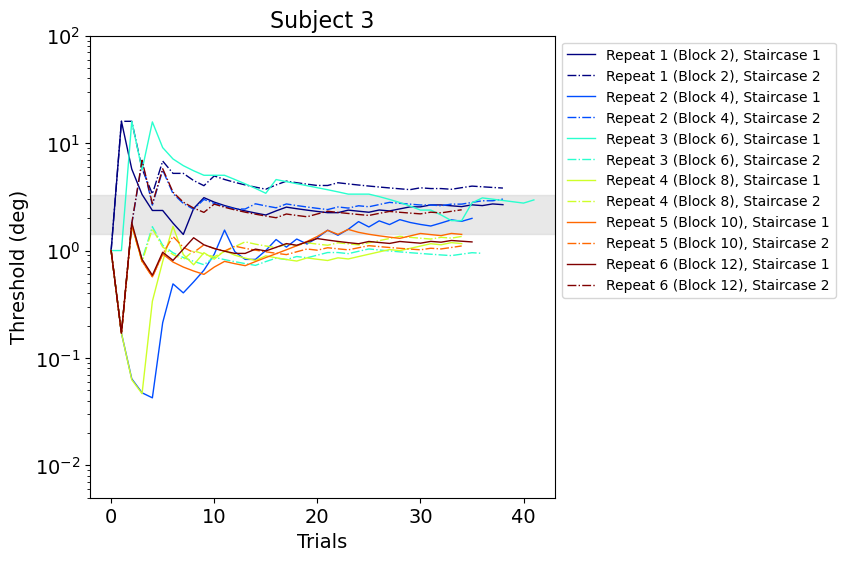

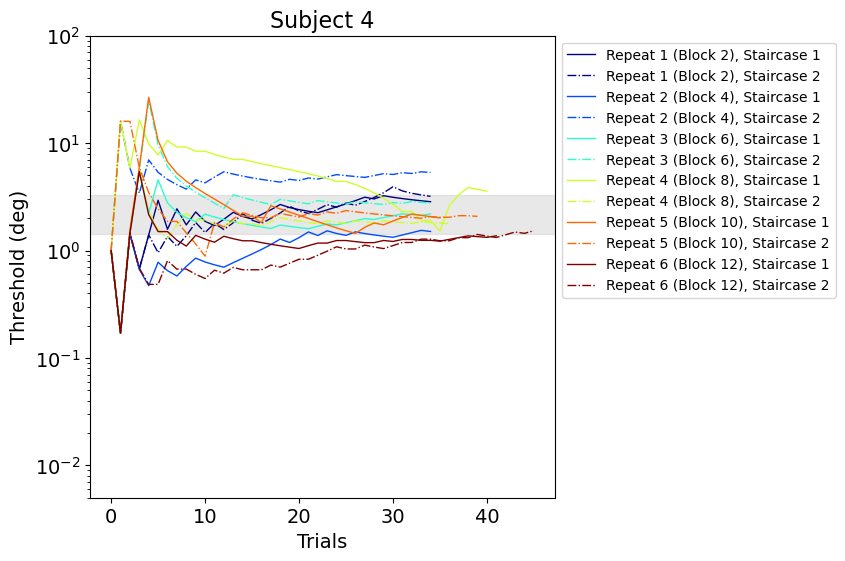

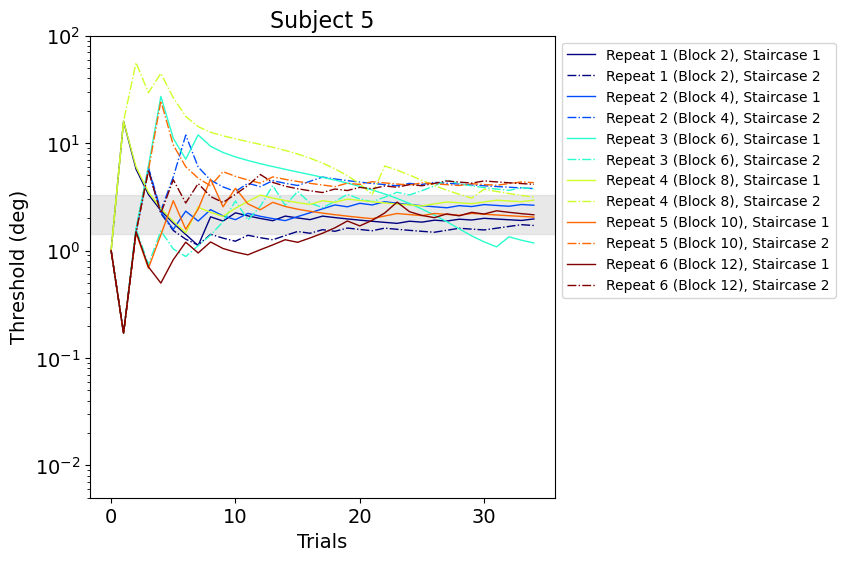

In [5]:
# crowding data with effort question
# Crowding new data
mydir = '/Users/helenhu/Documents/Variance_data/crowdingSixBlocksData/thirdRun_effortQ'
files = [f for f in os.listdir(mydir) if f.endswith('.csv')]
num_subj = len(files)

for subj in range(num_subj):
    filepath = os.path.join(mydir, files[subj])

    plotStaircase_LR(filepath, range(2,13,2), 2, subj+1, warnBouma = True, dispTypicalCrowdingThresholds = True, printBouma = False)

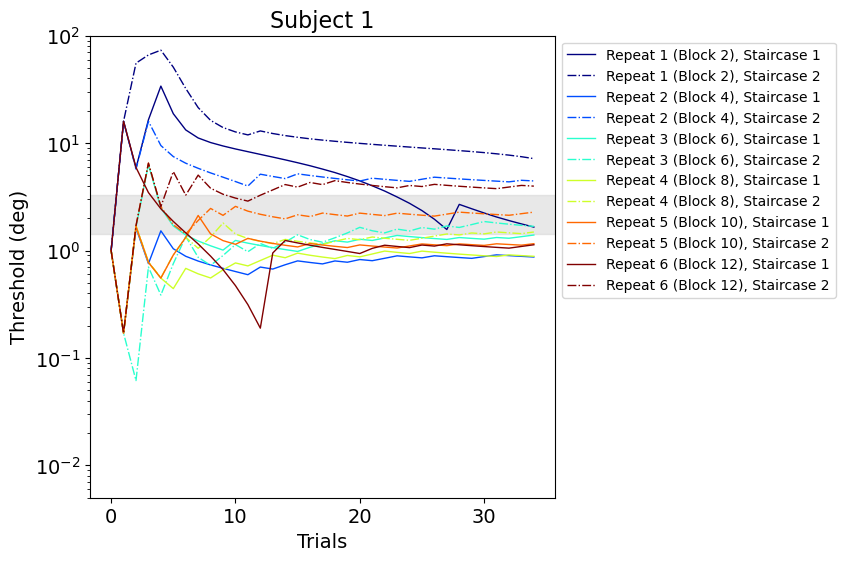

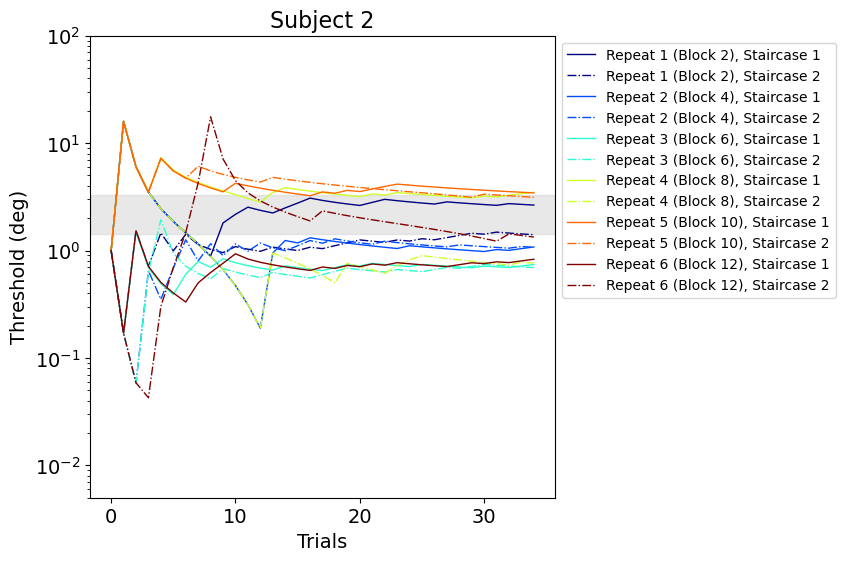

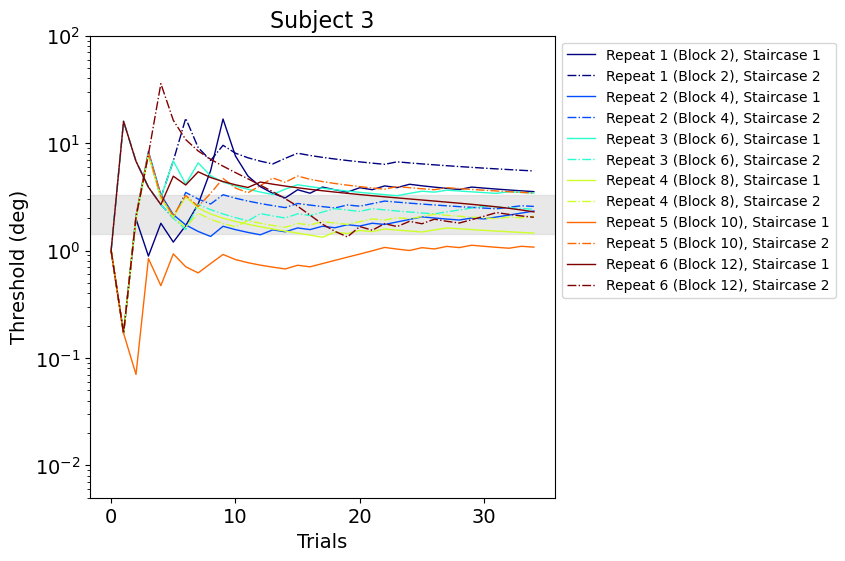

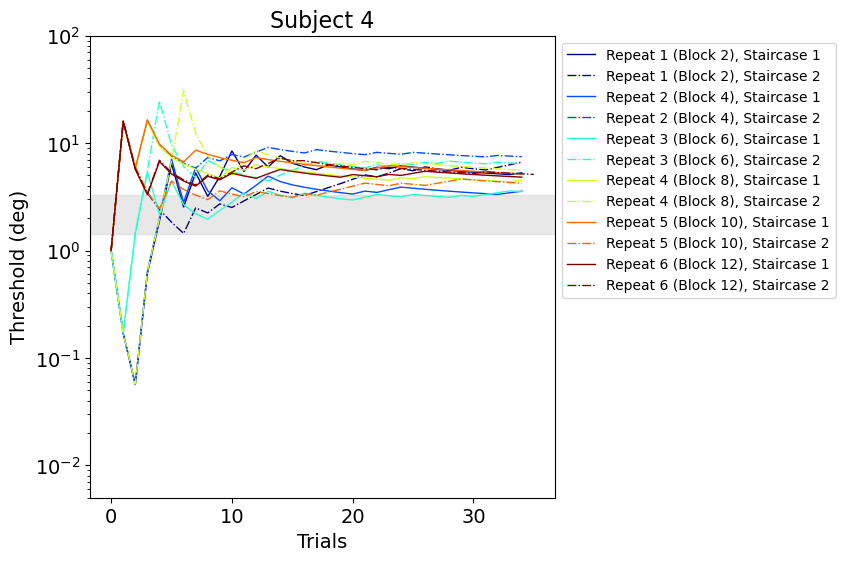

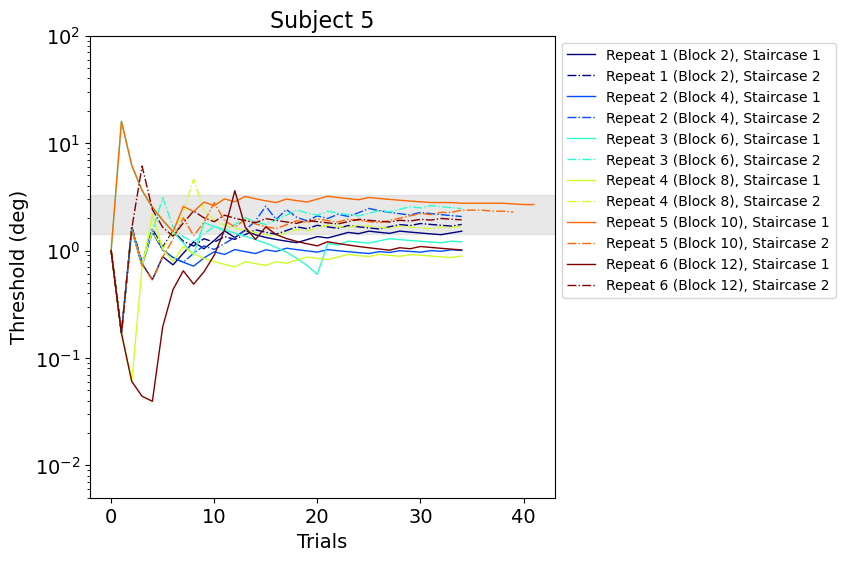

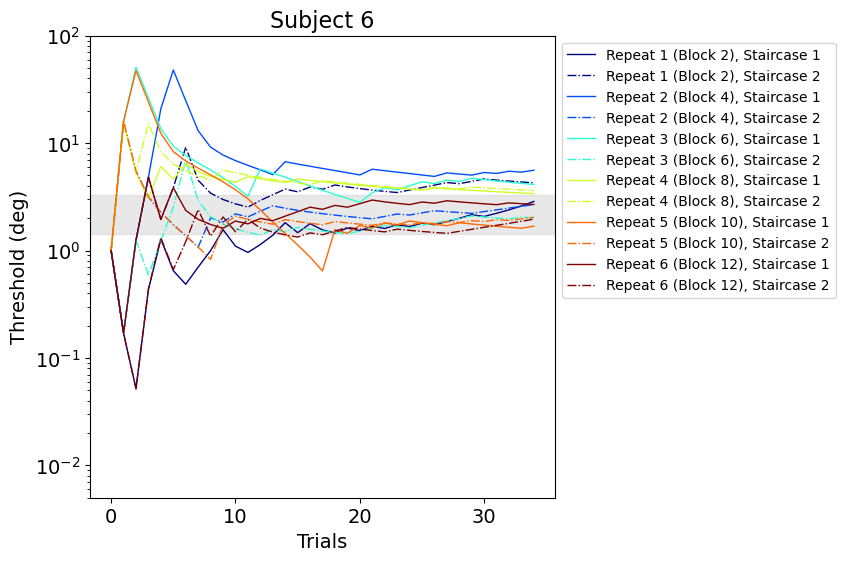

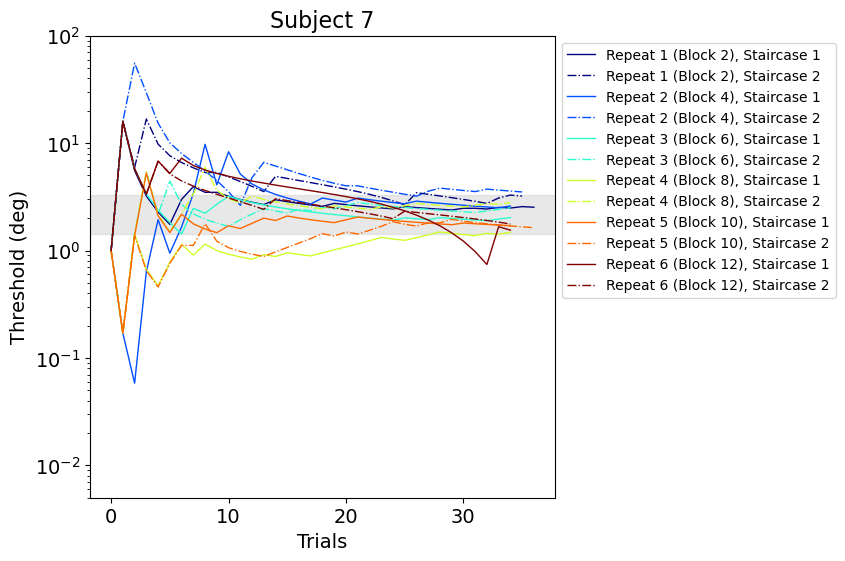

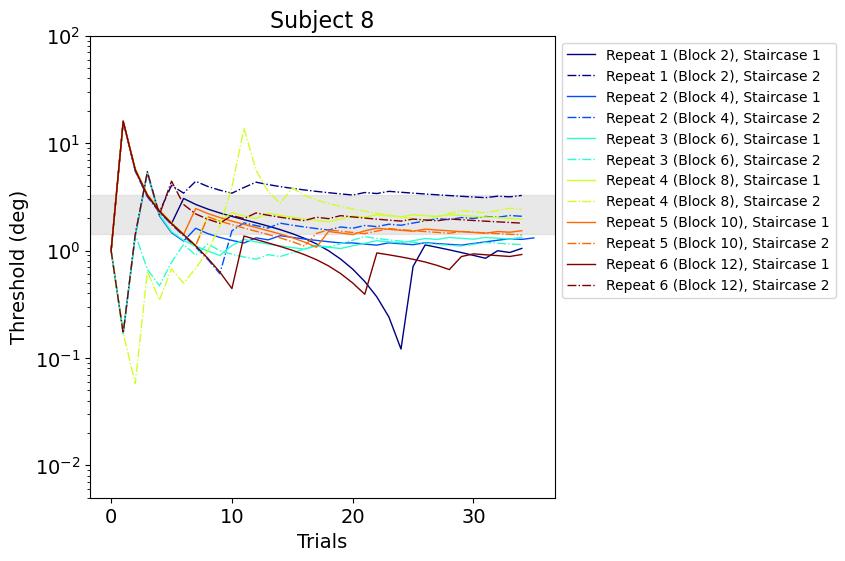

In [6]:
# Crowding new data
mydir = '/Users/helenhu/Documents/Variance_data/crowdingSixBlocksData/secondRun_strategyQ'
files = [f for f in os.listdir(mydir) if f.endswith('.csv')]
num_subj = len(files)

for subj in range(num_subj):
    filepath = os.path.join(mydir, files[subj])

    plotStaircase_LR(filepath, range(2,13,2), 2, subj+1, warnBouma = True, dispTypicalCrowdingThresholds = True, printBouma = False)

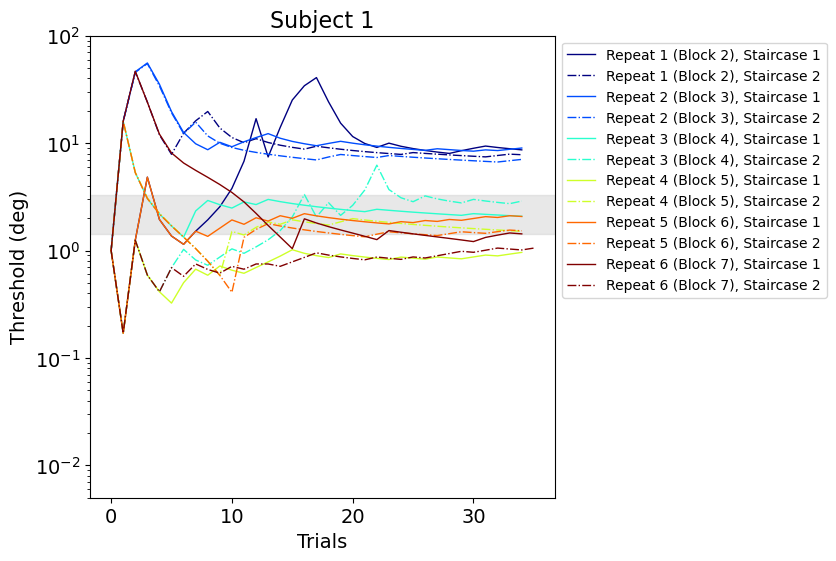

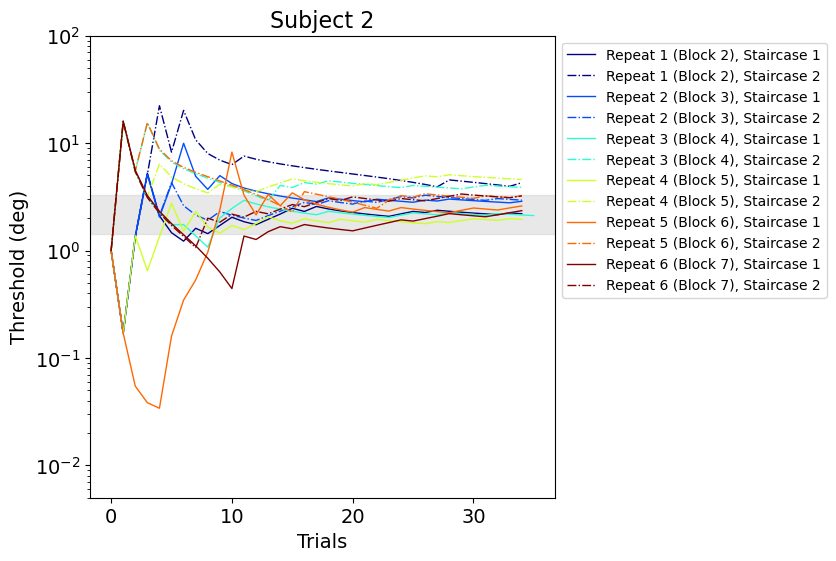

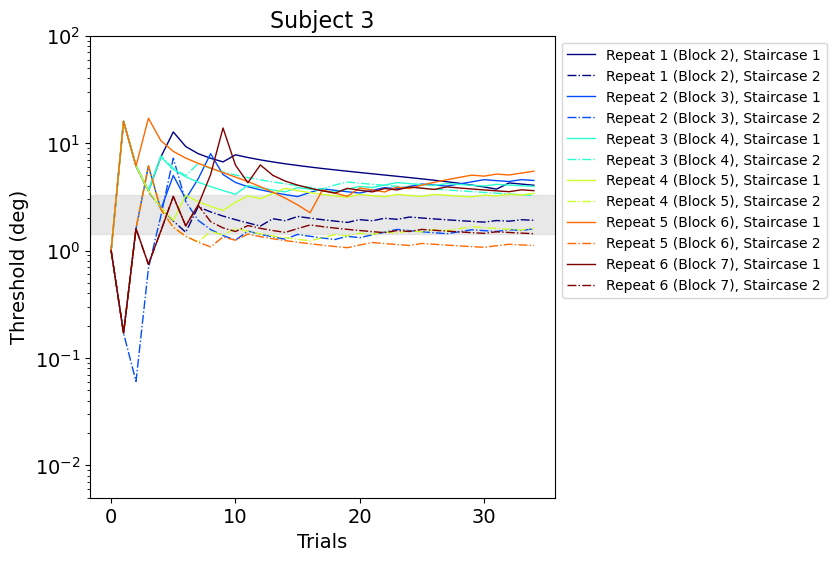

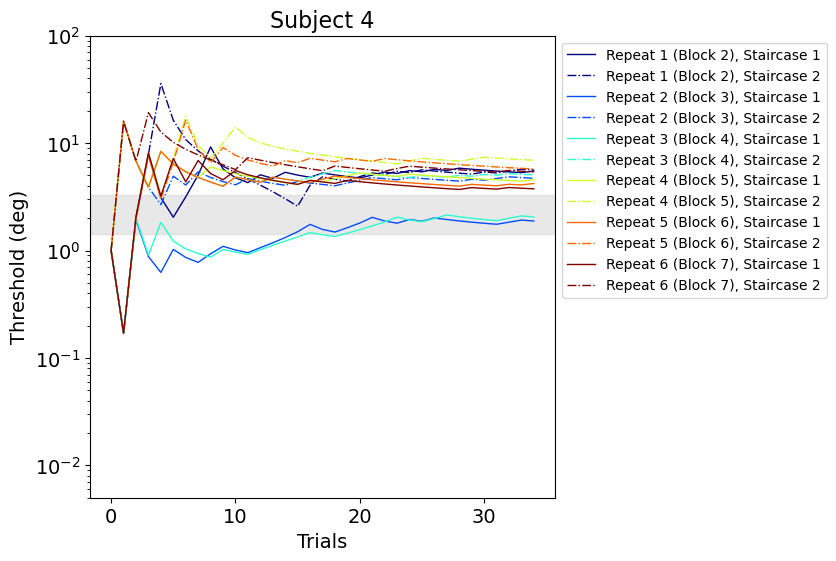

In [7]:
# Crowding old data
mydir = '/Users/helenhu/Documents/Variance_data/crowdingSixBlocksData/firstRun_4ppl'
files = [f for f in os.listdir(mydir) if f.endswith('.csv')]
num_subj = len(files)
for subj in range(num_subj):
    filepath = os.path.join(mydir, files[subj])

    plotStaircase_LR(filepath, range(2, 8), 2, subj+1, warnBouma = True, dispTypicalCrowdingThresholds = True, printBouma = False)

Number of subjects: 11


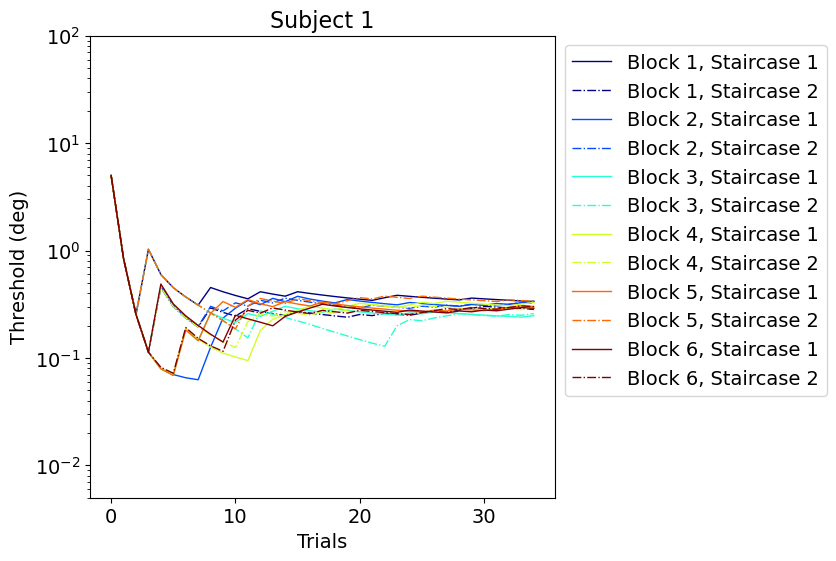

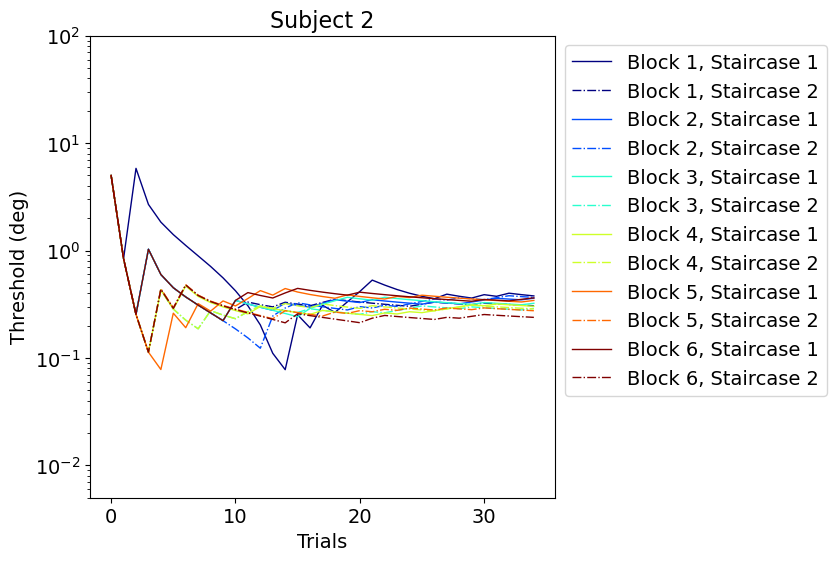

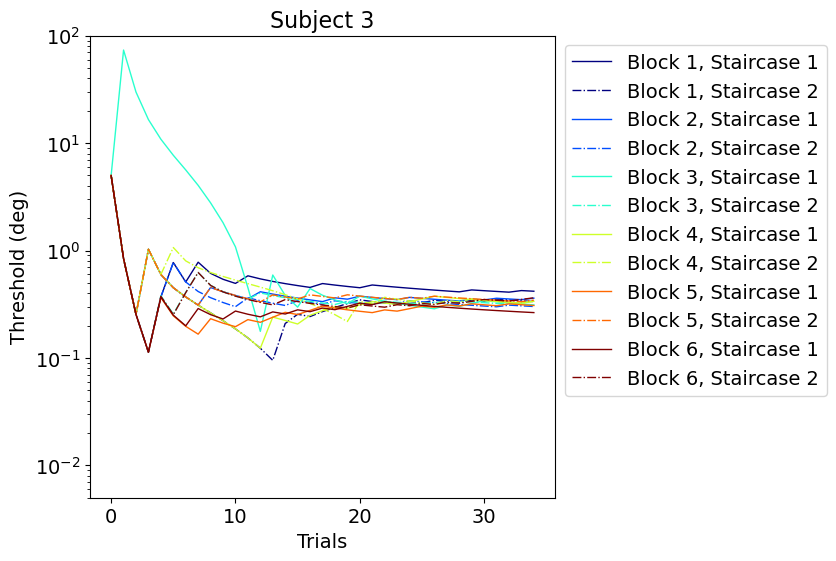

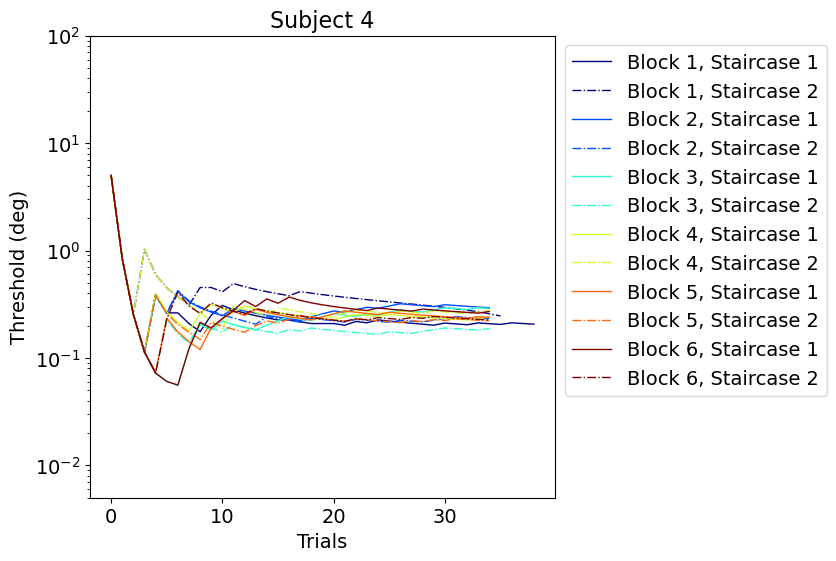

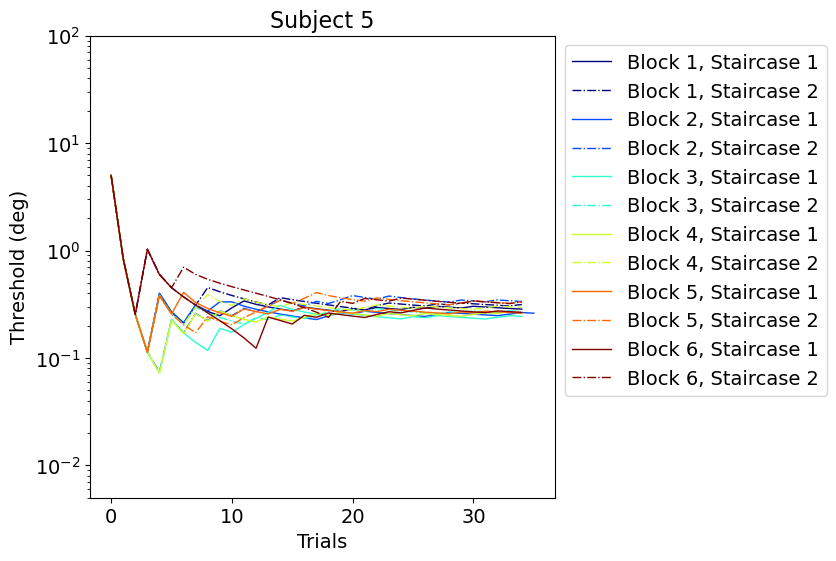

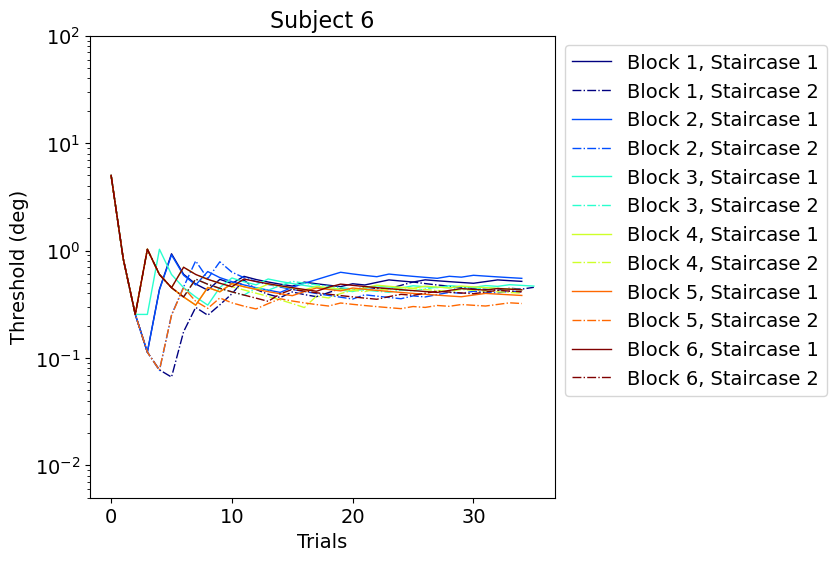

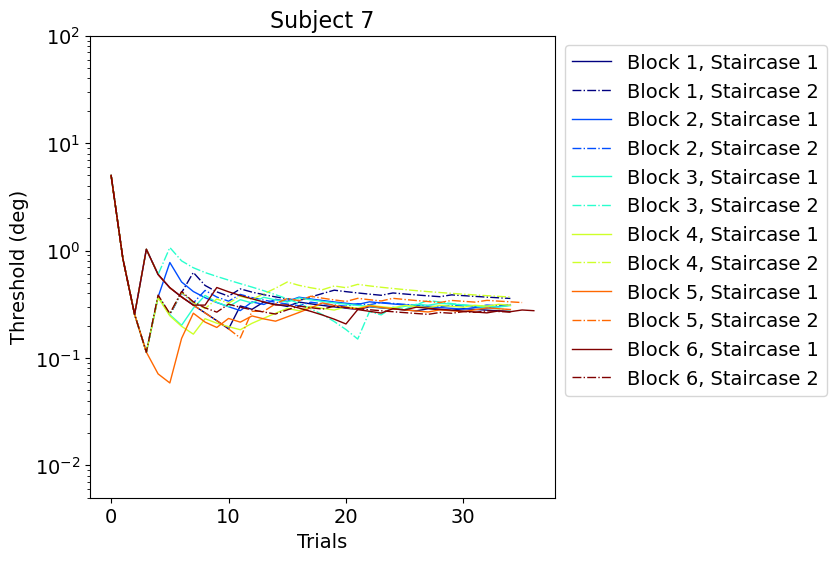

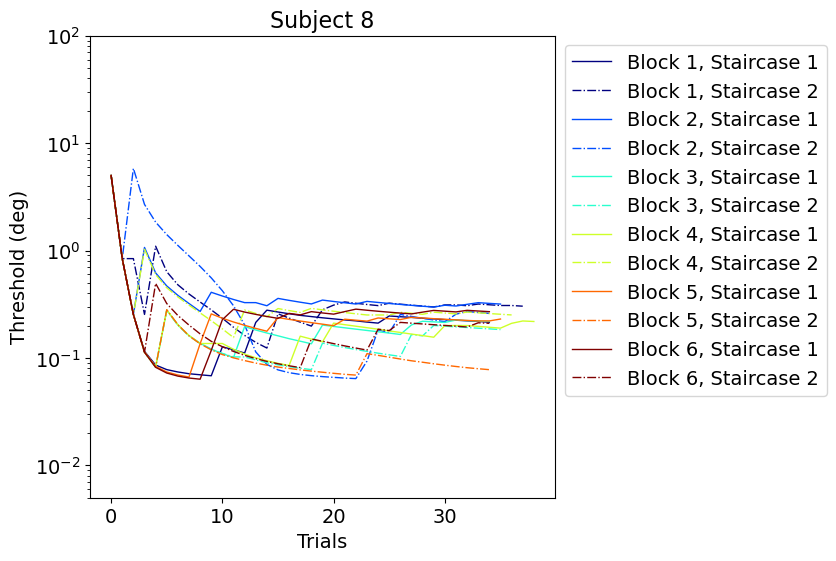

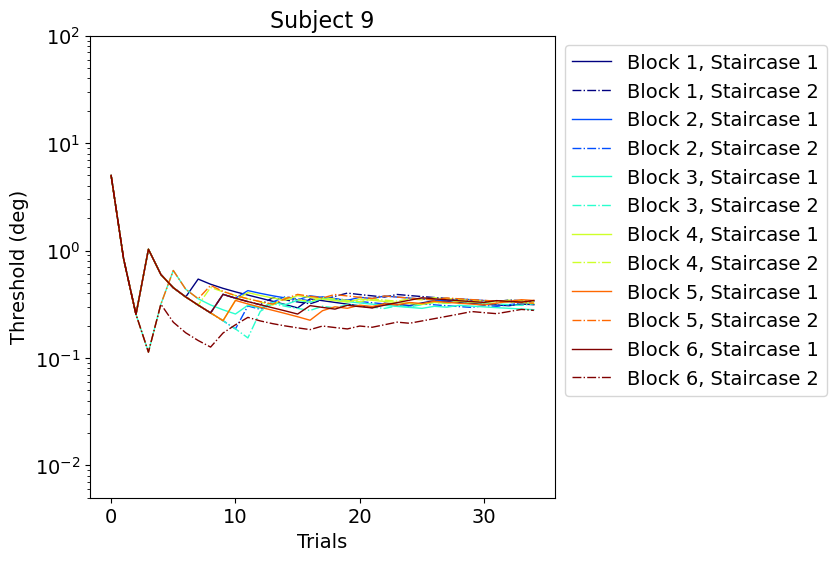

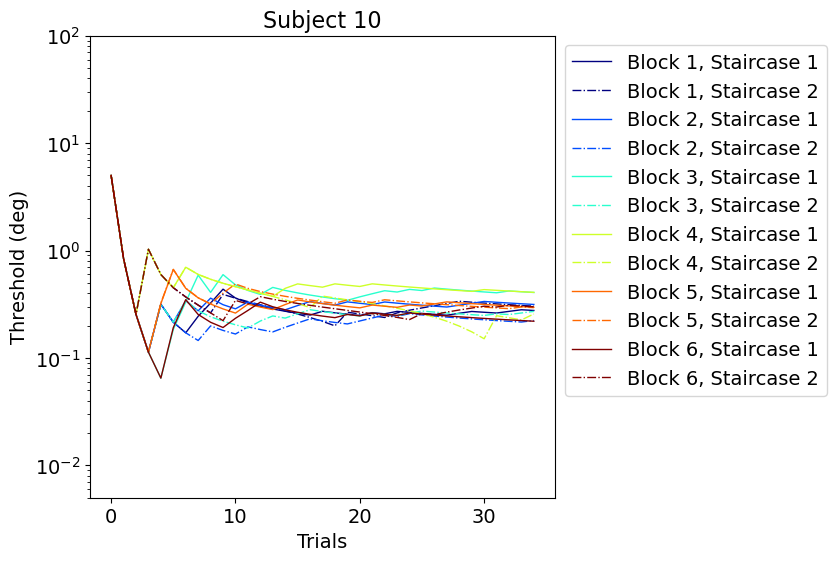

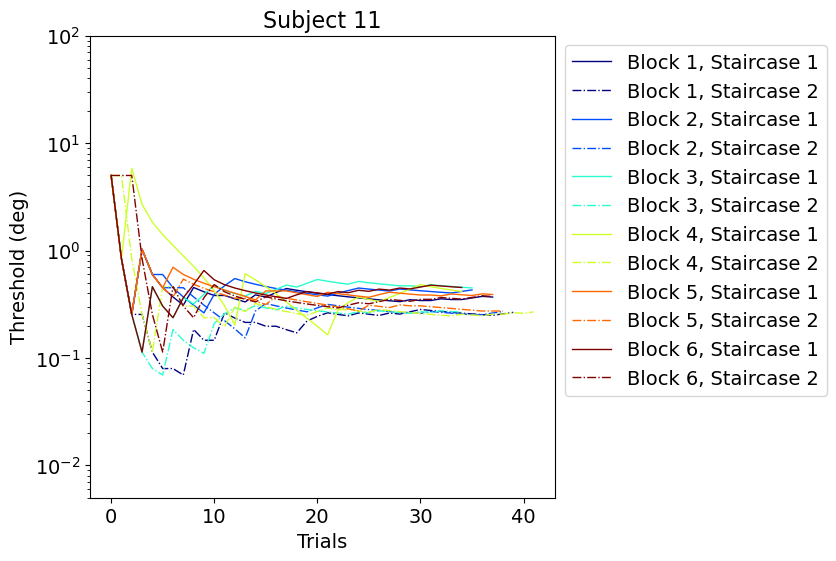

In [196]:
# Letter
mydir = '/Users/helenhu/Documents/MATLAB/Correlation/letterSixBlocksData'
files = [f for f in os.listdir(mydir) if f.endswith('.csv')]
num_subj = len(files)
print('Number of subjects:', num_subj)

for subj in range(num_subj):
    filepath = os.path.join(mydir, files[subj])

    plotStaircase_LR(filepath, range(2, 8), 2, subj+1)

Number of subjects: 15


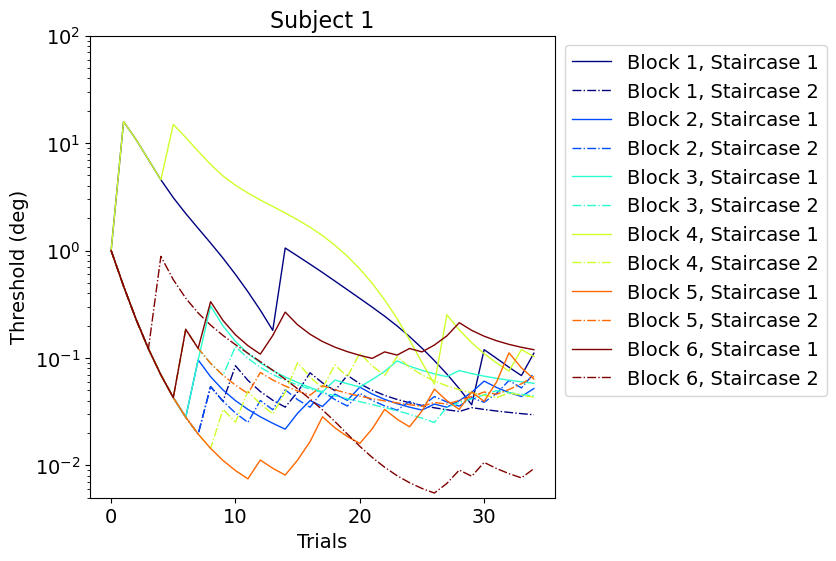

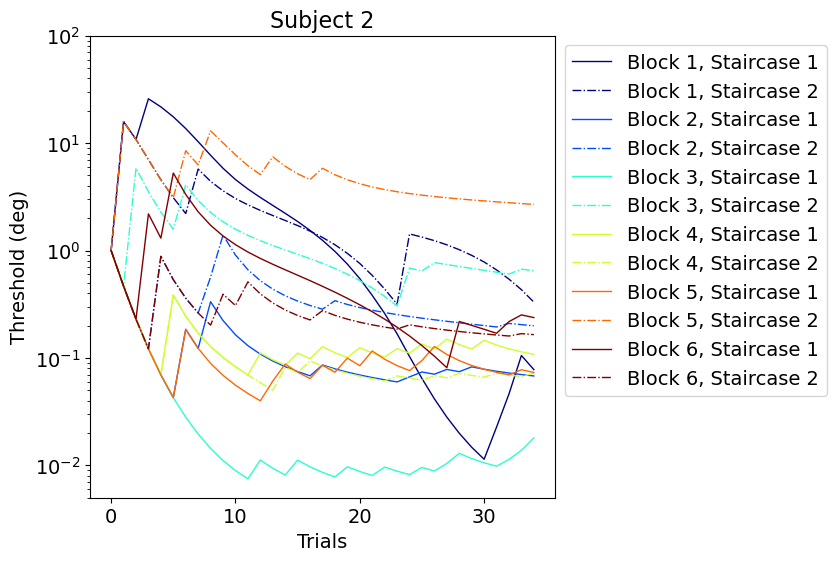

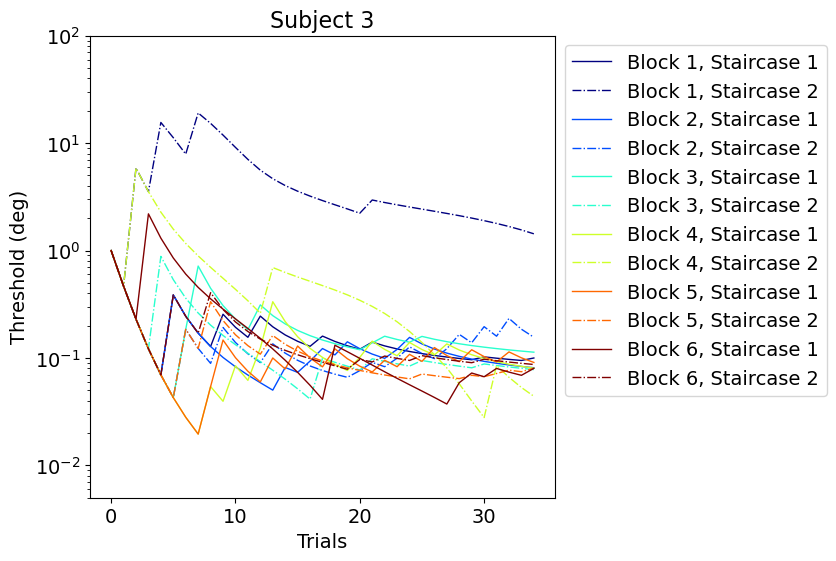

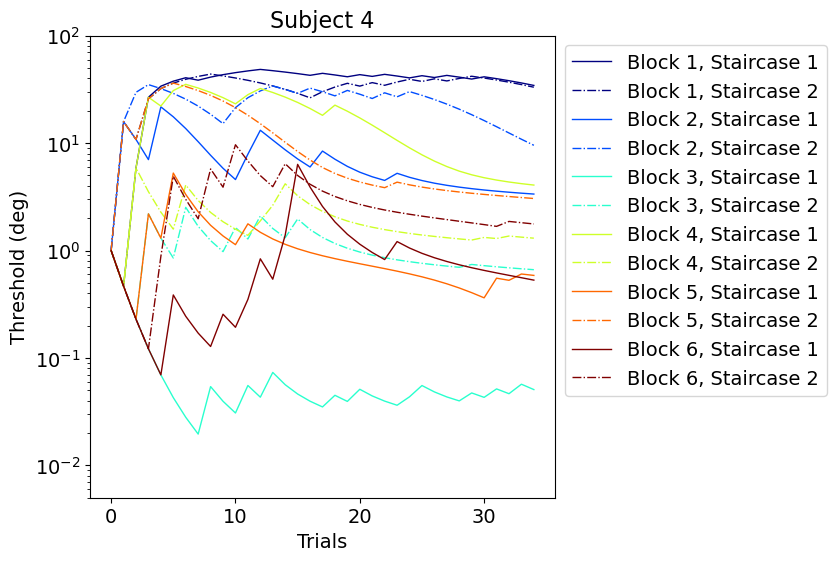

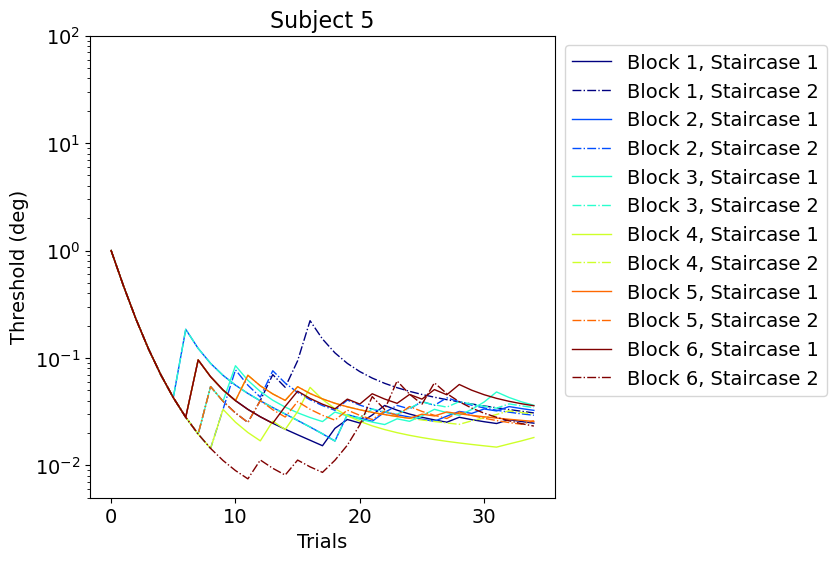

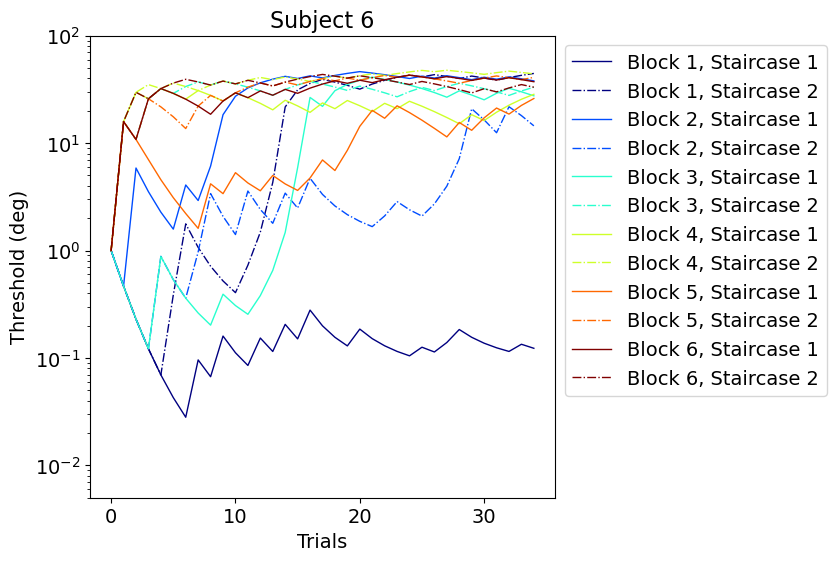

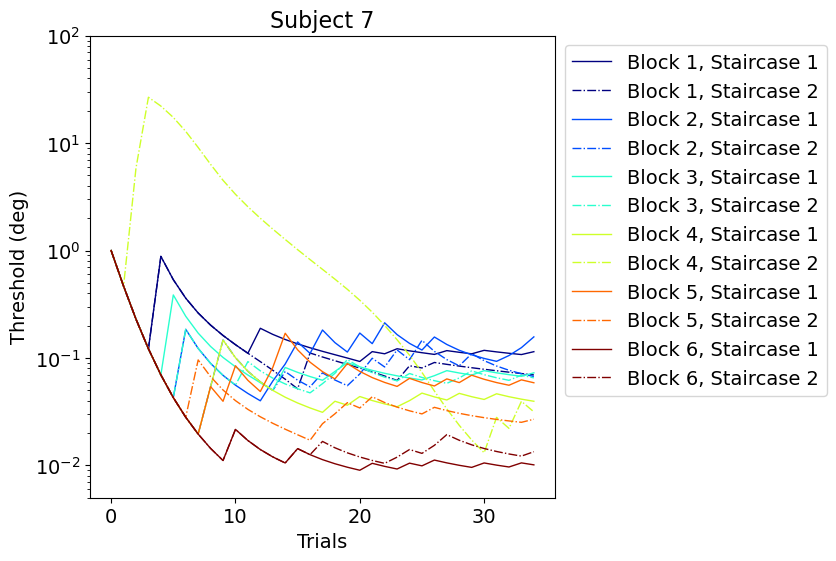

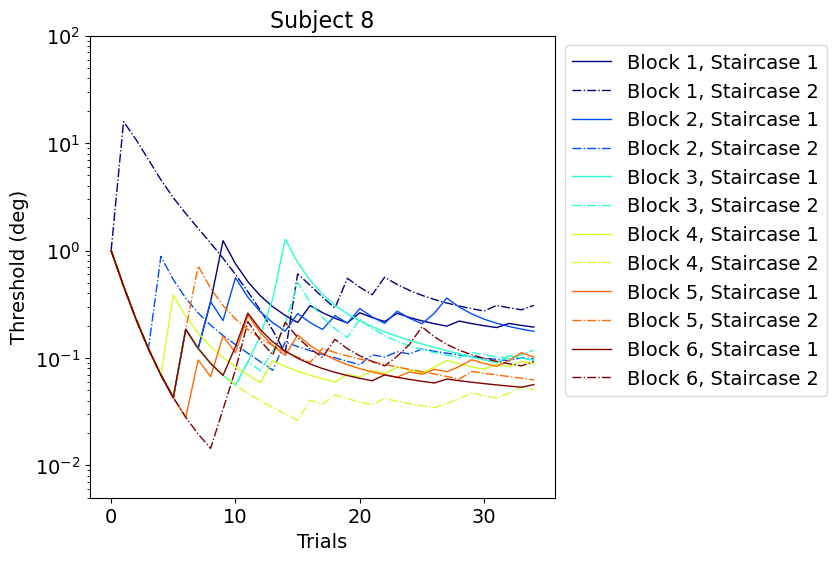

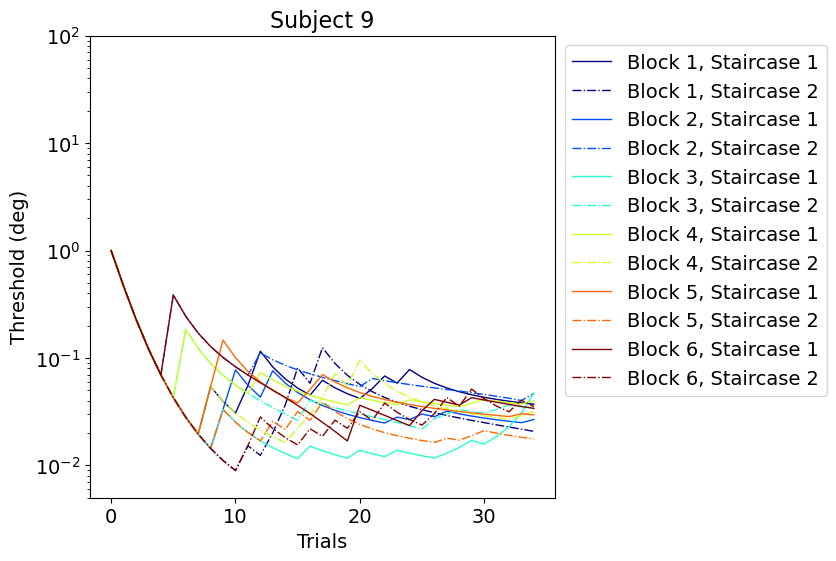

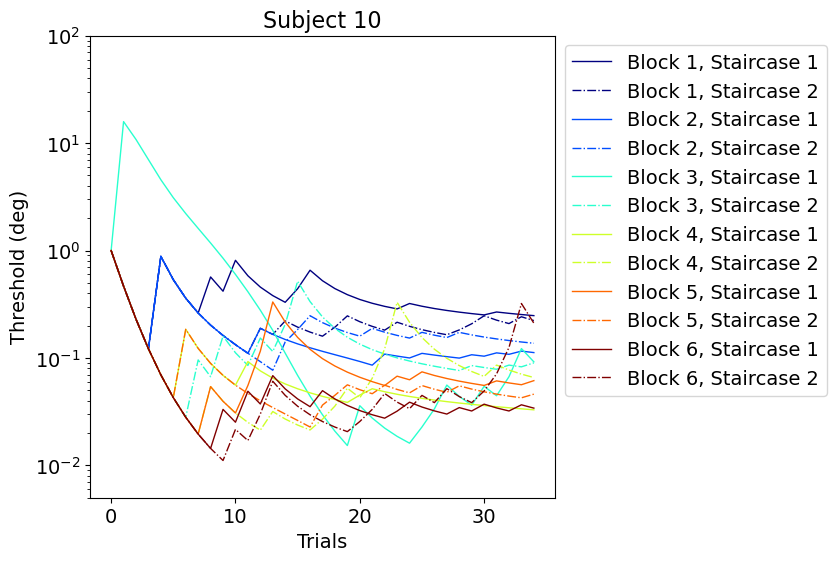

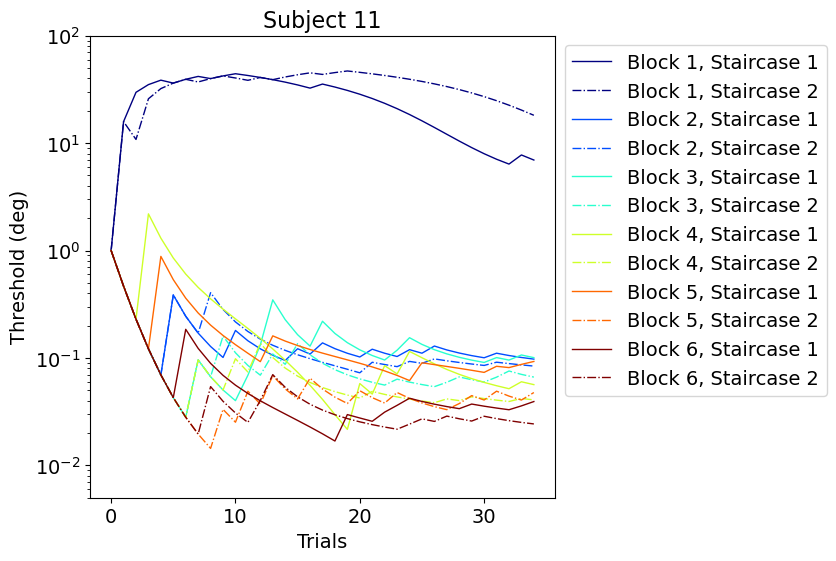

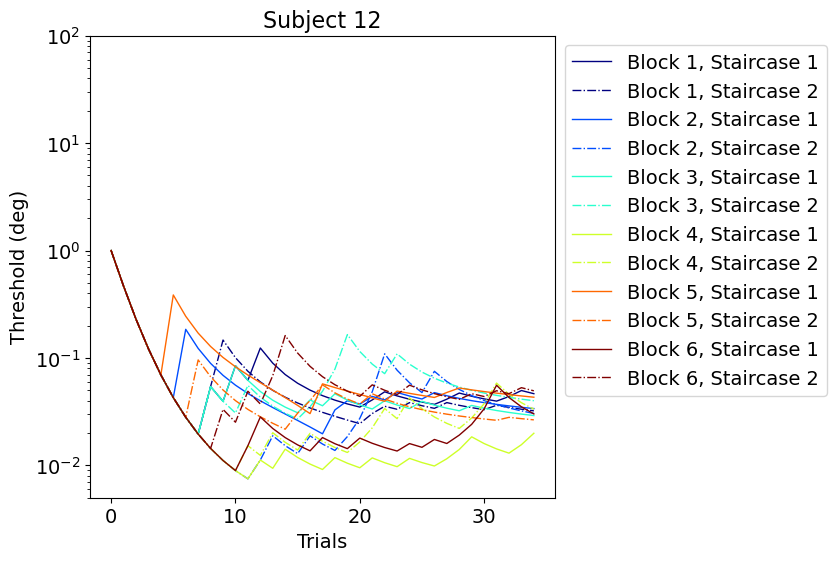

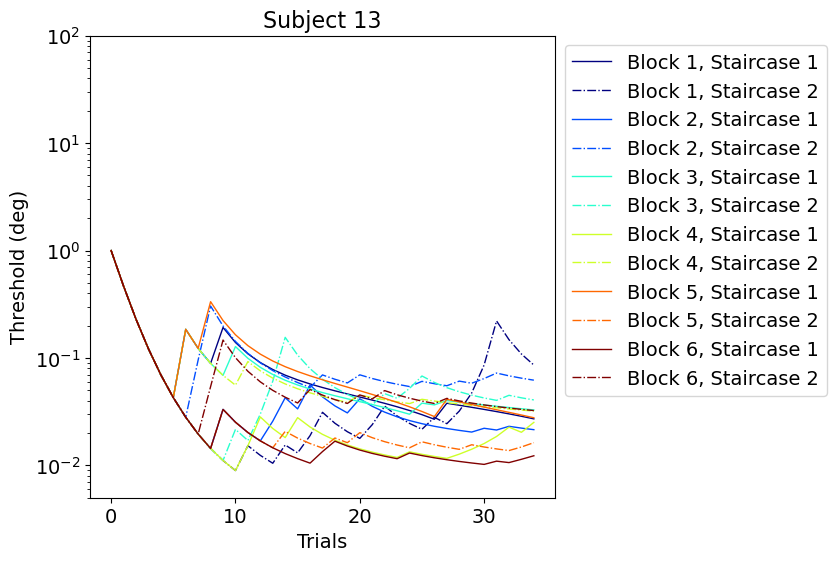

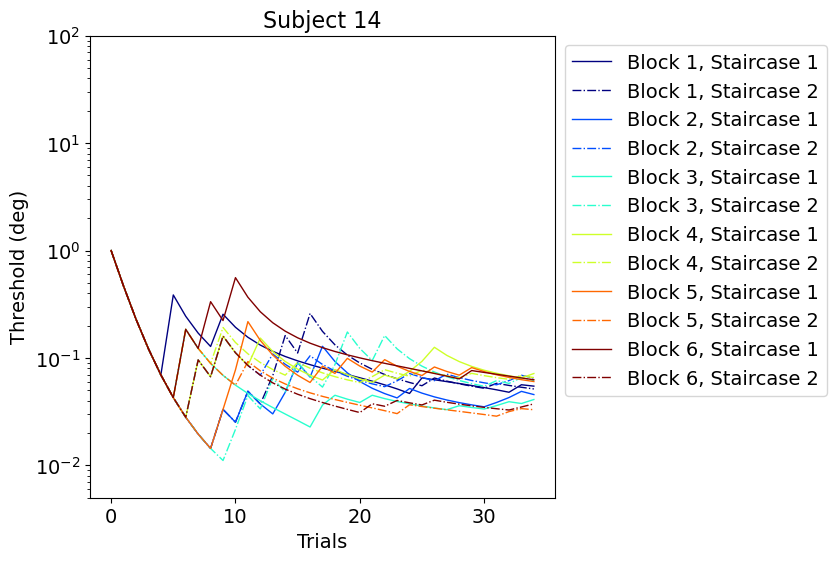

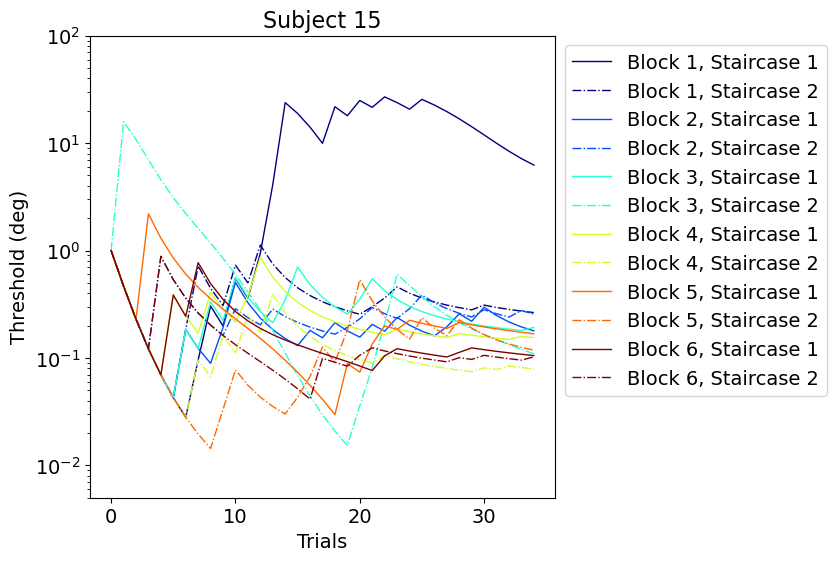

In [197]:
# Vernier
mydir = '/Users/helenhu/Documents/MATLAB/Correlation/vernierSixBlocksData'
files = [f for f in os.listdir(mydir) if f.endswith('.csv')]
num_subj = len(files)
print('Number of subjects:', num_subj)

for subj in range(num_subj):
    filepath = os.path.join(mydir, files[subj])

    plotStaircase_LR(filepath, range(2, 6), 2, subj+1)

Number of subjects: 9
 Staircase: 2_1 
 Number of trials sent: 24 

 Staircase: 3_1 
 Number of trials sent: 24 

 Staircase: 4_1 
 Number of trials sent: 24 

 Staircase: 5_1 
 Number of trials sent: 24 



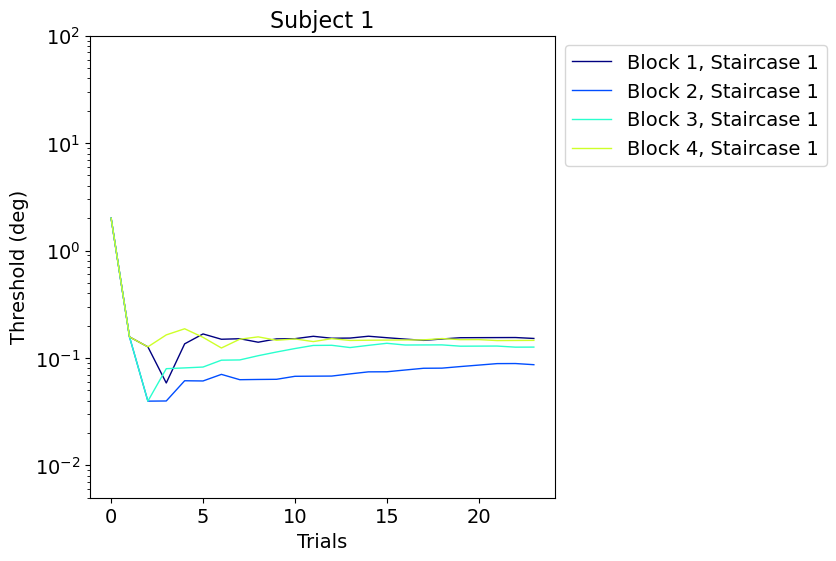

 Staircase: 2_1 
 Number of trials sent: 24 

 Staircase: 3_1 
 Number of trials sent: 24 

 Staircase: 4_1 
 Number of trials sent: 24 

 Staircase: 5_1 
 Number of trials sent: 24 



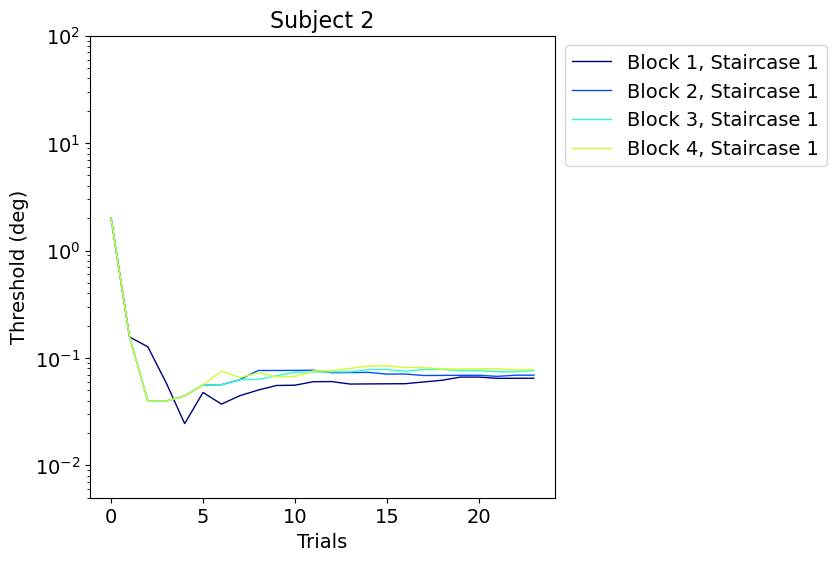

 Staircase: 2_1 
 Number of trials sent: 24 

 Staircase: 3_1 
 Number of trials sent: 24 

 Staircase: 4_1 
 Number of trials sent: 24 

 Staircase: 5_1 
 Number of trials sent: 24 



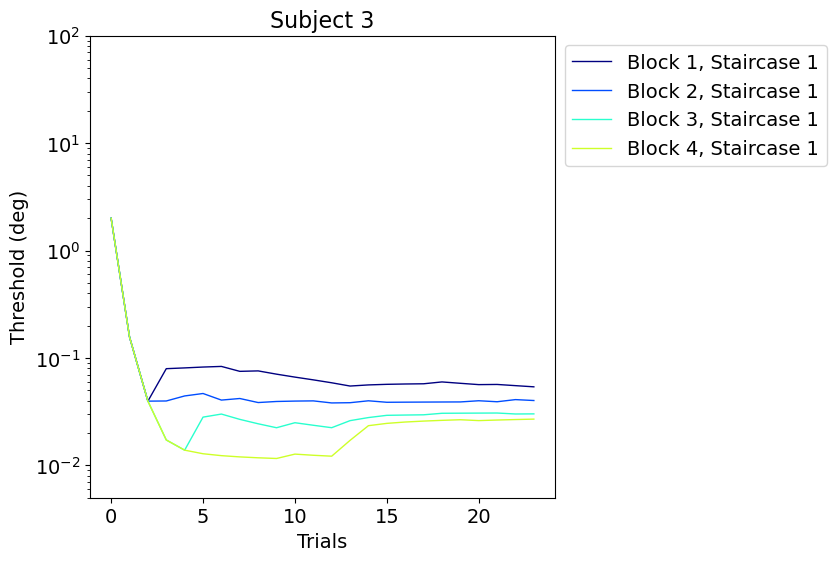

 Staircase: 2_1 
 Number of trials sent: 24 

 Staircase: 3_1 
 Number of trials sent: 24 

 Staircase: 4_1 
 Number of trials sent: 24 

 Staircase: 5_1 
 Number of trials sent: 24 



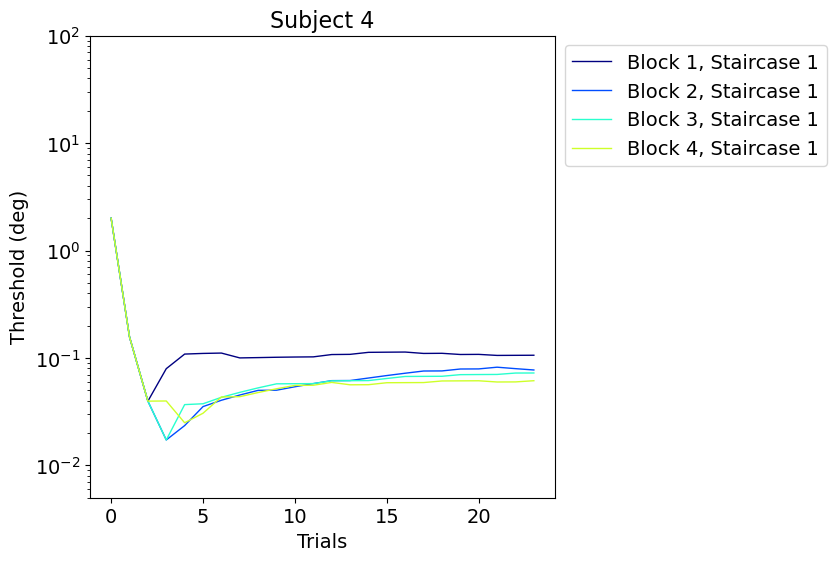

 Staircase: 2_1 
 Number of trials sent: 24 

 Staircase: 3_1 
 Number of trials sent: 24 

 Staircase: 4_1 
 Number of trials sent: 24 

 Staircase: 5_1 
 Number of trials sent: 24 



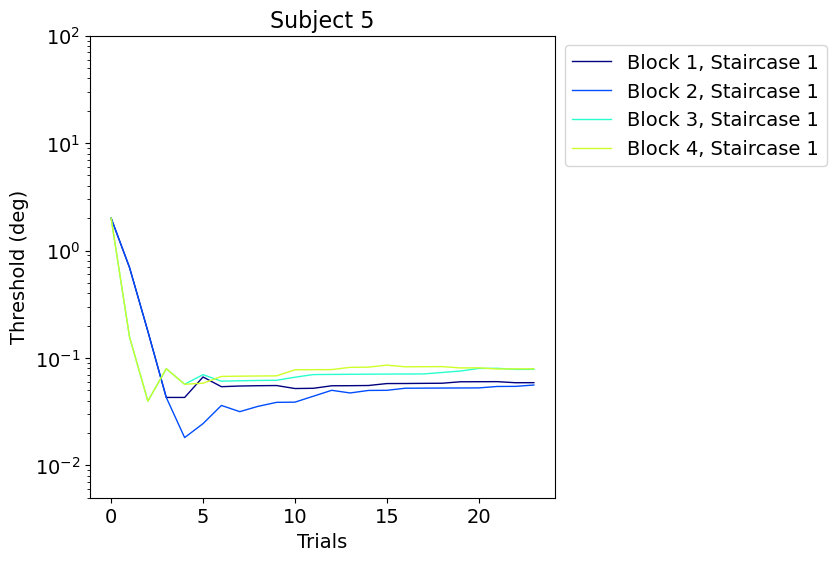

 Staircase: 2_1 
 Number of trials sent: 24 

 Staircase: 3_1 
 Number of trials sent: 24 

 Staircase: 4_1 
 Number of trials sent: 24 

 Staircase: 5_1 
 Number of trials sent: 24 



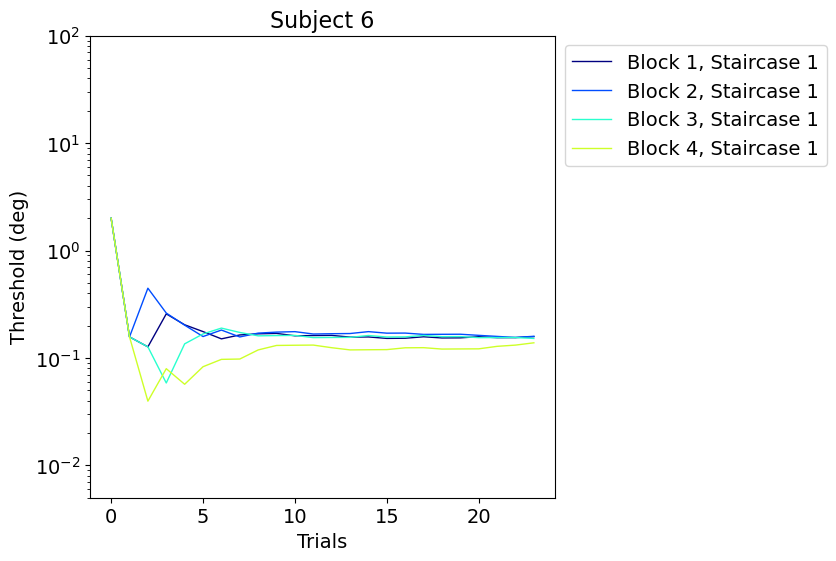

 Staircase: 2_1 
 Number of trials sent: 24 

 Staircase: 3_1 
 Number of trials sent: 24 

 Staircase: 4_1 
 Number of trials sent: 24 

 Staircase: 5_1 
 Number of trials sent: 24 



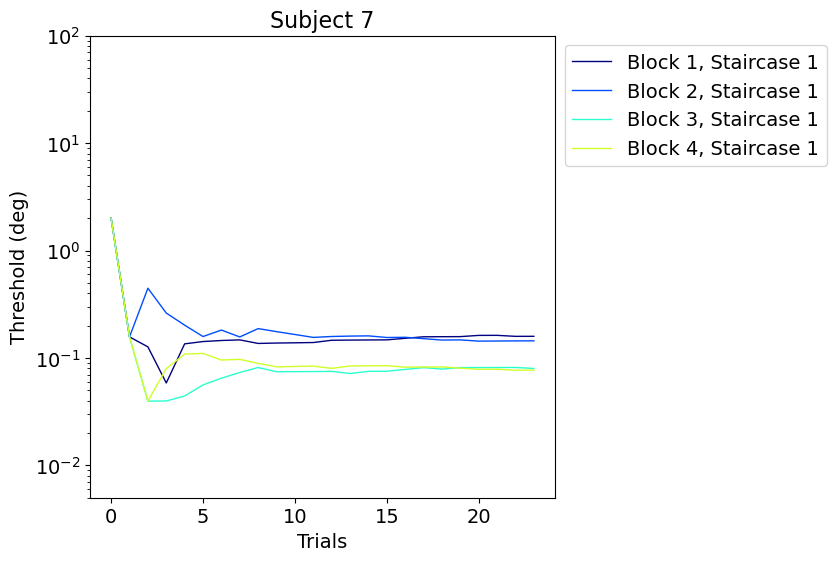

 Staircase: 2_1 
 Number of trials sent: 24 

 Staircase: 3_1 
 Number of trials sent: 24 

 Staircase: 4_1 
 Number of trials sent: 24 

 Staircase: 5_1 
 Number of trials sent: 24 



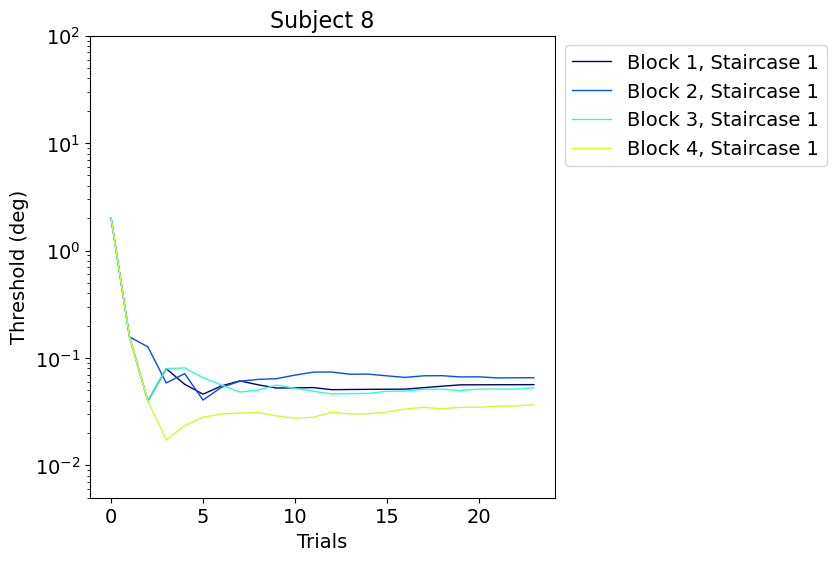

 Staircase: 2_1 
 Number of trials sent: 24 

 Staircase: 3_1 
 Number of trials sent: 24 

 Staircase: 4_1 
 Number of trials sent: 24 

 Staircase: 5_1 
 Number of trials sent: 24 



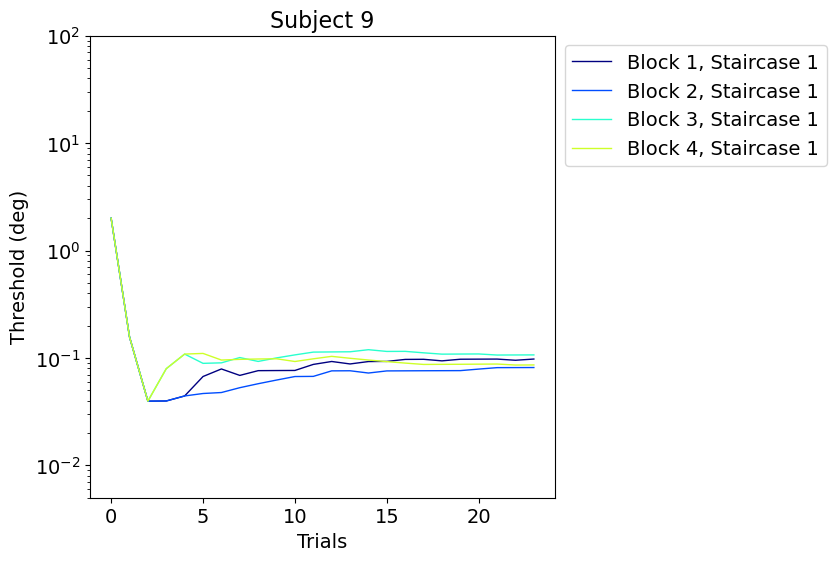

In [198]:
# RSVP
mydir = '/Users/helenhu/Documents/MATLAB/Correlation/rsvpFourBlocksData'
files = [f for f in os.listdir(mydir) if f.endswith('.csv')]
num_subj = len(files)
print('Number of subjects:', num_subj)

for subj in range(num_subj):
    filepath = os.path.join(mydir, files[subj])

    plotStaircase_LR(filepath, range(2, 6), 1, subj+1)

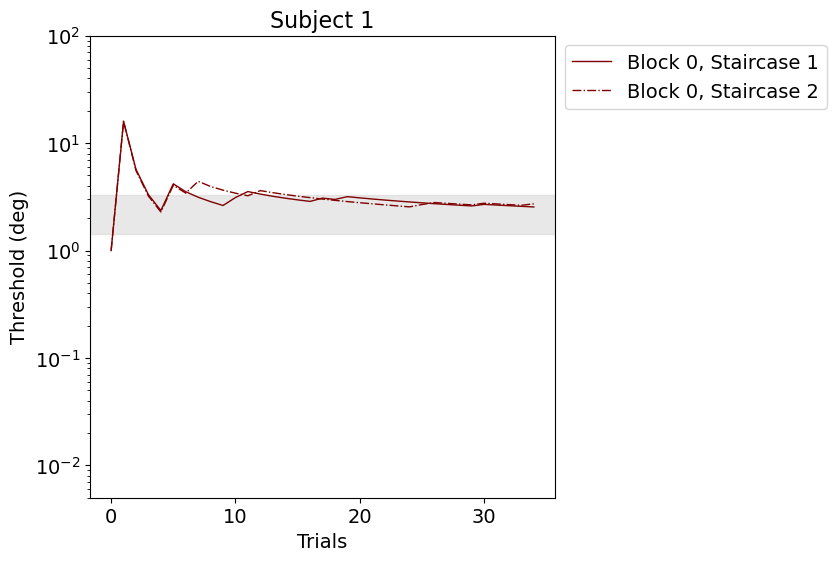

In [207]:
# Crowding Anna data
mydir = '/Users/helenhu/Downloads/crowdingoneblock1.results'
files = [f for f in os.listdir(mydir) if f.endswith('.csv')]
num_subj = len(files)

for subj in range(num_subj):
    filepath = os.path.join(mydir, files[subj])

    plotStaircase_LR(filepath, [0], 2, subj+1, warnBouma = True, dispTypicalCrowdingThresholds = True, printBouma = False)